In [75]:
import pandas as pd


# Read the CSV file into a DataFrame
df = pd.read_csv('StackOverflow_cleaned_datafile.csv')

# Display the first few rows of the DataFrame
df.head(30)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,YearsCodePro,DevType,OrgSize,Country,...,JobStTeamDrivingStgy,OverallRoleSat,AIDevHaveWorkedWith,AIBen,AIToolCurrently Using,Industry,EmbeddedHaveWorkedWith,AISearchDevHaveWorkedWith,Amount_in__USD,Amount_numeric
0,9,I am a developer by profession,"Employed, full-time",Hybrid,I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Developer, back-end",I don’t know,Netherlands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49221.93
1,13,I am a developer by profession,"Employed, full-time",Hybrid,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, full-stack",2 to 9,United States of America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65000.00
2,23,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,Something else,20,"Developer, back-end",100 to 499,Canada,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89777.55
3,24,"I am not primarily a developer, but I write co...","Employed, full-time",Hybrid,I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Other (please specify):,20 to 99,Netherlands,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16350.24
4,32,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",21,"Developer, full-stack","10,000 or more",United States of America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102000.00
5,73,"I used to be a developer by profession, but no...","Employed, full-time",Fully remote,I don’t code outside of work,"Associate degree (A.A., A.S., etc.)",22,Other (please specify):,NaN,United States of America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130000.00
6,75,I am a developer by profession,"Employed, full-time",Full in-person,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,"Developer, full-stack",10 to 19,Sweden,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3792.97
7,85,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Developer, full-stack",20 to 99,United Kingdom of Great Britain and Northern I...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70941.34
8,89,I am a developer by profession,"Employed, full-time",Hybrid,I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Developer, full-stack",100 to 499,Germany,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71692.81
9,94,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects;Freel...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Developer, front-end",10 to 19,United States of America,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166000.00


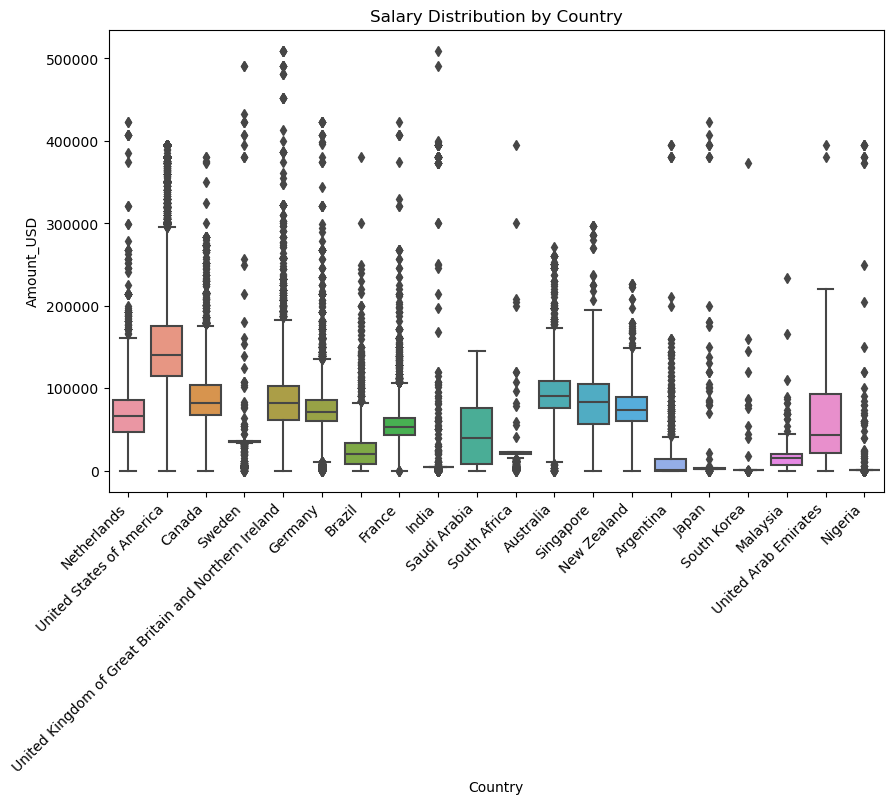

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the box plot with adjusted 'whis' parameter to reduce outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Amount_numeric', data=df, whis=2)  # Increase 'whis' to 2

# Set the title and labels
plt.title('Salary Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Amount_USD')

# Adjust the size of the x-axis labels and rotate them
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.show()


In [ ]:

##As the whiskers are long, in case of America, UAE means the data has a wide range. 

## countries like Malaysia, japan, australia, newzealand, germany, brazil and france have short whiskers, means the data points are more concentrated.

## USA has the highest median salary, followed by canada.


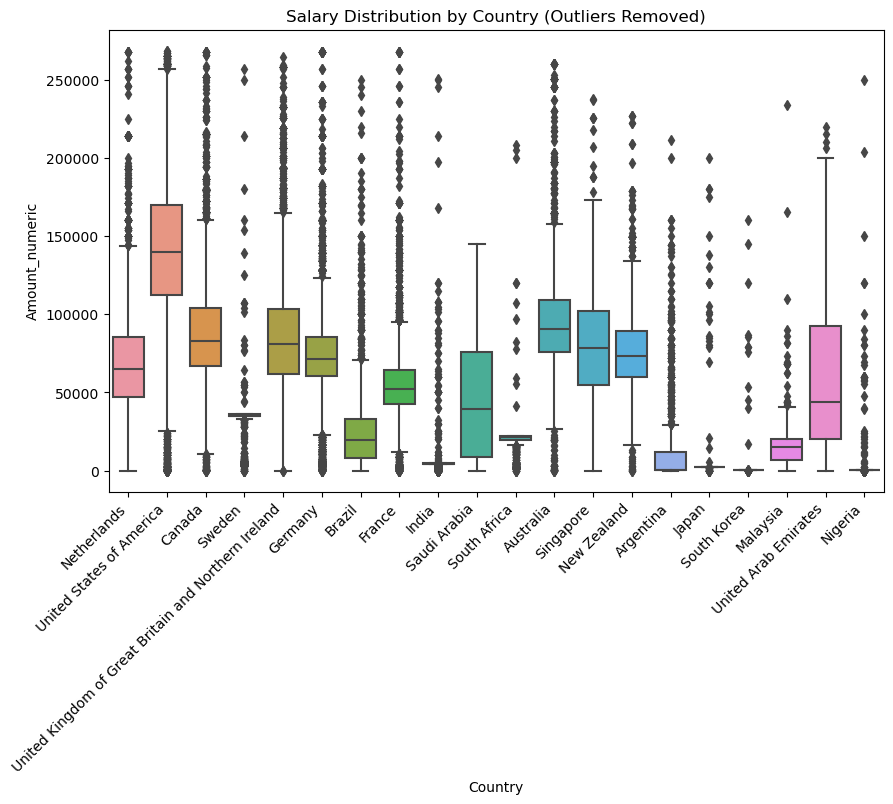

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


 ## Calculate IQR to remove outliers
Q1 = df['Amount_numeric'].quantile(0.25)
Q3 = df['Amount_numeric'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
df_filtered = df[(df['Amount_numeric'] >= lower_bound) & (df['Amount_numeric'] <= upper_bound)]

# Create the box plot without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Amount_numeric', data=df_filtered)

# Set the title and labels
plt.title('Salary Distribution by Country (Outliers Removed)')
plt.xlabel('Country')
plt.ylabel('Amount_numeric')

# Adjust the size of the x-axis labels and rotate them
plt.xticks(rotation=45, ha='right', fontsize=10)

# Show the plot
plt.show()
#ot



Chi2 Value: 9407.53685460421
P-Value: 0.0
Degrees of Freedom: 76
Expected Frequencies:
[[1.60738137e+01 6.42630212e+01 3.36851694e+02 1.00869628e+02
  2.88941844e+02]
 [5.22847100e+01 2.09033991e+02 1.09570718e+03 3.28107525e+02
  9.39866592e+02]
 [6.46936145e+01 2.58644725e+02 1.35575502e+03 4.05978378e+02
  1.16292826e+03]
 [9.22800234e+01 3.68935040e+02 1.93387100e+03 5.79094158e+02
  1.65881978e+03]
 [8.29384886e+01 3.31587634e+02 1.73810465e+03 5.20472280e+02
  1.49089695e+03]
 [1.90694786e+02 7.62396735e+02 3.99630497e+03 1.19668627e+03
  3.42791724e+03]
 [1.68884593e+02 6.75199699e+02 3.53923855e+03 1.05981855e+03
  3.03585860e+03]
 [1.11142355e+01 4.44346541e+01 2.32916041e+02 6.97462853e+01
  1.99788784e+02]
 [6.69244288e+00 2.67563509e+01 1.40250519e+02 4.19977632e+01
  1.20302924e+02]
 [6.44346807e+01 2.57609509e+02 1.35032866e+03 4.04353464e+02
  1.15827369e+03]
 [1.80257762e+01 7.20669569e+01 3.77758095e+02 1.13118975e+02
  3.24030197e+02]
 [9.46104277e+00 3.78251984e+01 1

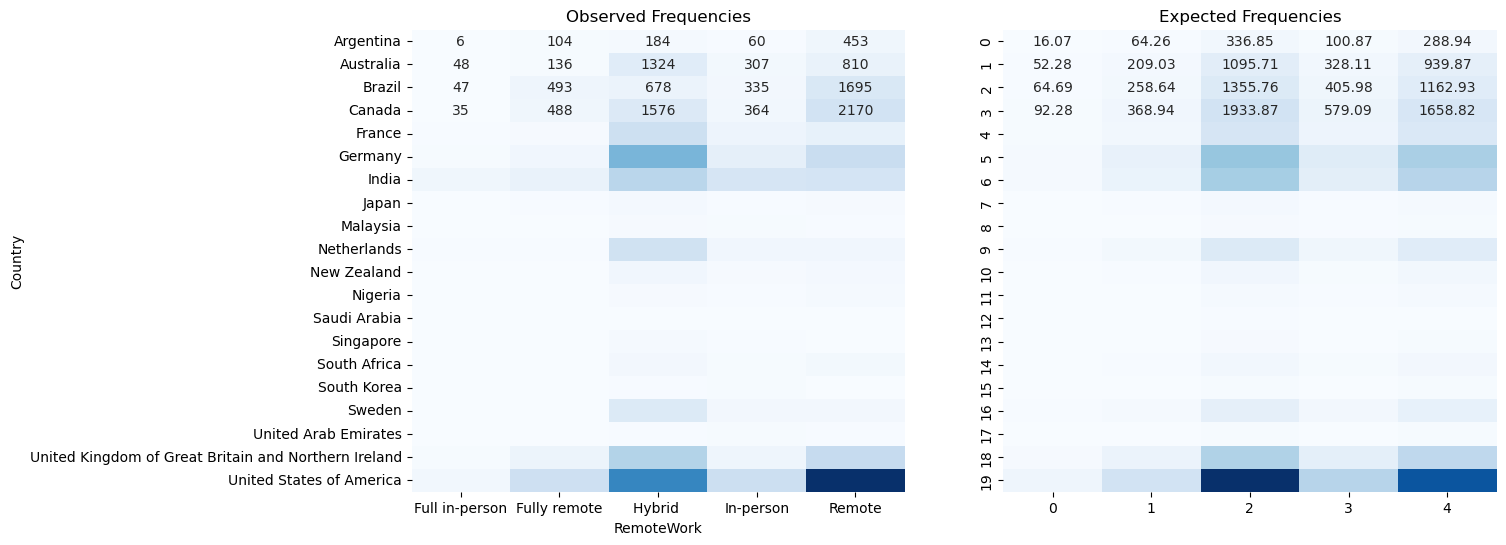

In [21]:
###Chi-square test to analyze categorical data differences---remote vs in office

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


# Create a contingency table (cross-tabulation)
contingency_table = pd.crosstab(df['Country'], df['RemoteWork'])

# Perform Chi-Square Test for Independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print results of the Chi-Square Test
print(f"Chi2 Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Visualize the observed vs. expected frequencies using a heatmap
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap for Observed frequencies
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d", ax=ax[0], cbar=False)
ax[0].set_title('Observed Frequencies')

# Heatmap for Expected frequencies
sns.heatmap(expected, annot=True, cmap="Blues", fmt="0.2f", ax=ax[1], cbar=False)
ax[1].set_title('Expected Frequencies')

plt.show()


In [ ]:
###Since the p-value is far less than typical significance thresholds (e.g., 0.05 or 0.01), it rejects the null hypothesis. 
##This suggests that the two variables  Work Type and Country are dependent or have a significant association.
##Chi-Square Value is very high (9407.54).
## this strongly suggests that there is a significant difference between the observed and expected frequencies.
##Based on the p-value and Chi-Square statistic, we can conclude that there is a statistically significant relationship between the two variables. 


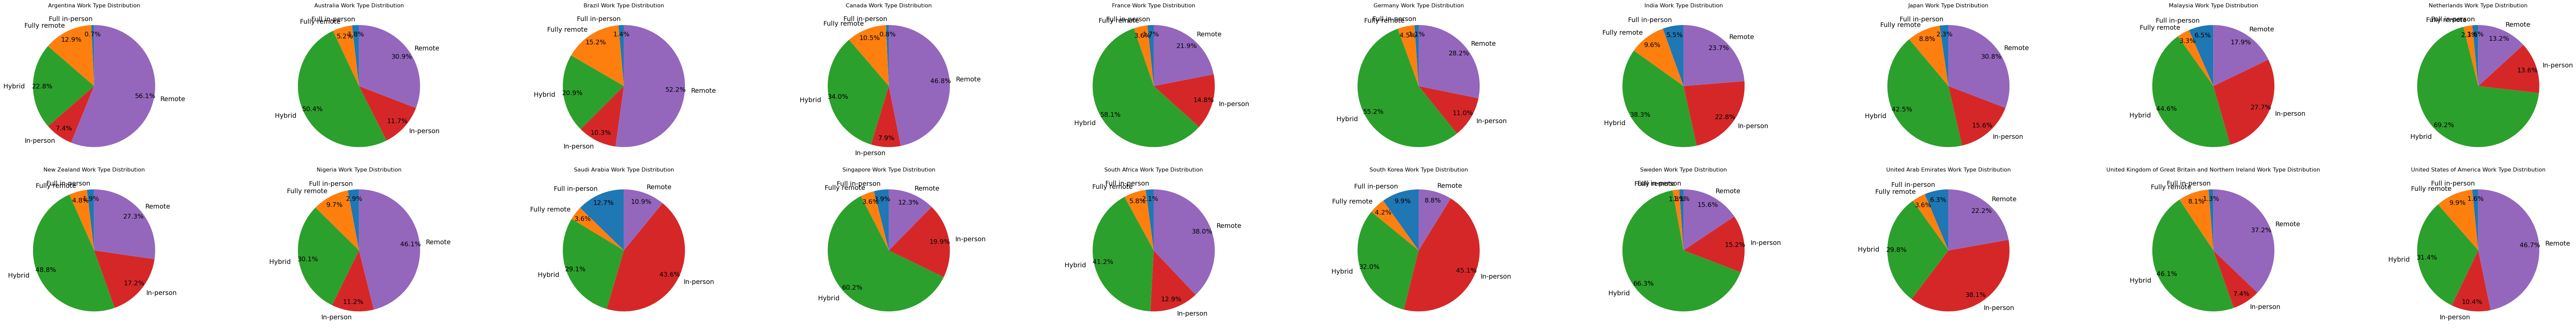

In [32]:
import pandas as pd
import matplotlib.pyplot as plt



# Group data by country and remote work status, then count occurrences
grouped = df.groupby(['Country', 'RemoteWork']).size().unstack()

# Determine number of rows and columns based on the number of countries
num_countries = len(grouped)
num_columns = num_countries // 2  # Split into two rows

# Adjust the figure size to accommodate the pie charts
fig, axes = plt.subplots(2, num_columns, figsize=(80, 10))

# Ensure axes is iterable even if there's only one row or one column
if num_countries % 2 != 0:
    axes = axes.flatten()

# Create pie charts for each country
for idx, (country, counts) in enumerate(grouped.iterrows()):
    # Calculate the row and column index for each subplot
    row = idx // num_columns
    col = idx % num_columns

    # Plot the pie chart for each country
    wedges, texts, autotexts = axes[row, col].pie(counts, 
                                                 labels=counts.index, 
                                                 autopct='%1.1f%%', 
                                                 startangle=90, 
                                                 pctdistance=0.85)

    # Set title for the pie chart
    axes[row, col].set_title(f'{country} Work Type Distribution')

    # Adjust the font size of the labels and percentages
    for text in texts:
        text.set_fontsize(14)  # Make labels bigger

    for autotext in autotexts:
        autotext.set_fontsize(14)  # Make percentage text bigger

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


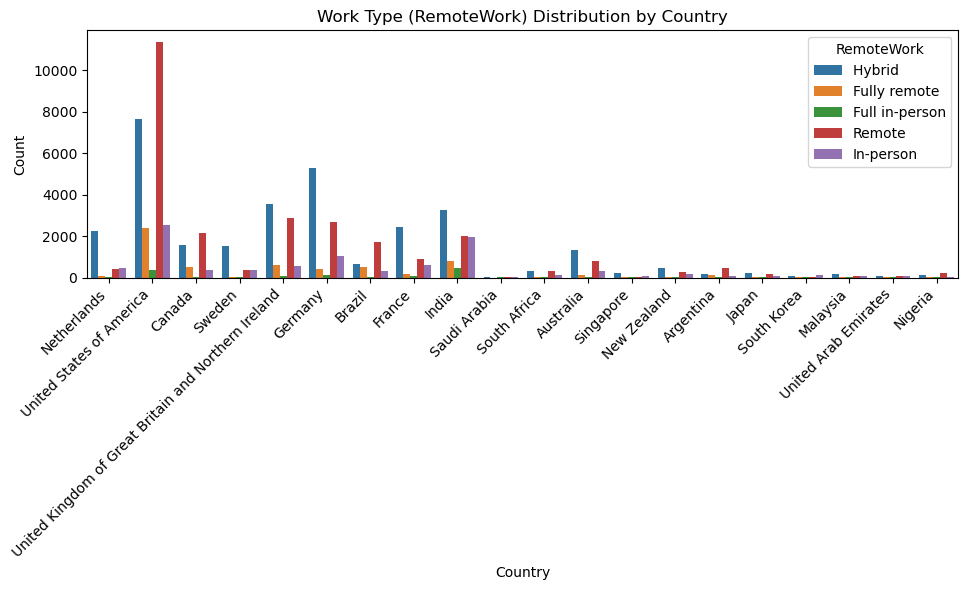

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot (clustered bar graph)
plt.figure(figsize=(10, 6))  # Adjust the figure size to avoid overlap

# Clustered bar chart using seaborn
sns.countplot(x='Country', hue='RemoteWork', data=df)

# Add labels and title
plt.title('Work Type (RemoteWork) Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



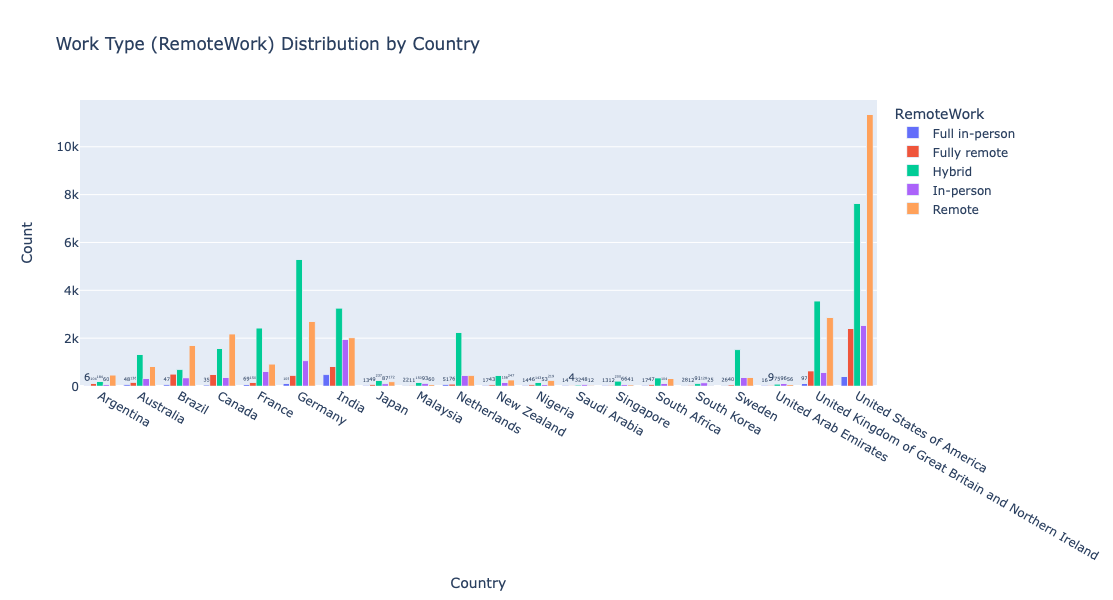

In [38]:
import pandas as pd
import plotly.express as px



# Create a count of the values for each combination of Country and RemoteWork
df_counts = df.groupby(['Country', 'RemoteWork']).size().reset_index(name='Count')

# Create the clustered bar chart with hover data and increased size
fig = px.bar(df_counts, 
             x='Country', 
             y='Count', 
             color='RemoteWork', 
             barmode='group',  # Creates the clustered bar effect
             text='Count',     # Displays the count value on top of each bar
             hover_data=['Country', 'RemoteWork', 'Count'],  # Show Country, RemoteWork, and Count on hover
             title="Work Type (RemoteWork) Distribution by Country",
             height=600,  # Increase the height of the graph
             width=1000)  # Increase the width of the graph

# Show the plot
fig.show()


In [51]:
print(data['ToolsTechHaveWorkedWith'].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: ToolsTechHaveWorkedWith, dtype: float64


In [55]:
df['ToolsTechHaveWorkedWith'].unique()

array([nan, 'Docker', 'Docker;Kubernetes;npm;Terraform;Yarn', ...,
       'Docker;Kubernetes;Pip;pnpm',
       'Docker;Gradle;Homebrew;Kubernetes;Maven (build tool);Pip;Puppet',
       'Ansible;APT;Docker;Maven (build tool);npm;Pip;Vite'], dtype=object)

All unique tools: {'tunit', 'Pacman', 'Ninja', 'Composer', 'NuGet', 'doctest', 'pnpm', 'CUTE', 'ELFspy', 'Chocolatey', 'Docker', 'Ant', 'Godot', 'npm', 'Catch2', 'Boost.Test', 'Google Test', 'Pulumi', 'Yarn', 'Chef', 'Cargo', 'Podman', 'MSBuild', 'APT', 'No Tool used', 'Meson', 'cppunit', 'Unity 3D', 'Visual Studio Solution', 'build2', 'Webpack', 'Bun', 'SCons', "LLVM's Clang", 'Ansible', 'Maven (build tool)', 'Nix', 'bandit', 'snitch', 'CMake', 'Vite', 'Terraform', 'Pip', 'Dagger', 'Flow', 'lest', 'Unreal Engine', 'Gradle', 'Kubernetes', 'liblittletest', 'Wasmer', 'GNU GCC', 'MSVC', 'QMake', 'Puppet', 'Make', 'Homebrew'}
                         ToolsTechHaveWorkedWith  tunit  Pacman  Ninja  \
Year                                                                     
2022-01-01                          No Tool used      0       0      0   
2022-01-01                                Docker      0       0      0   
2022-01-01  Docker;Kubernetes;npm;Terraform;Yarn      0       0      0   


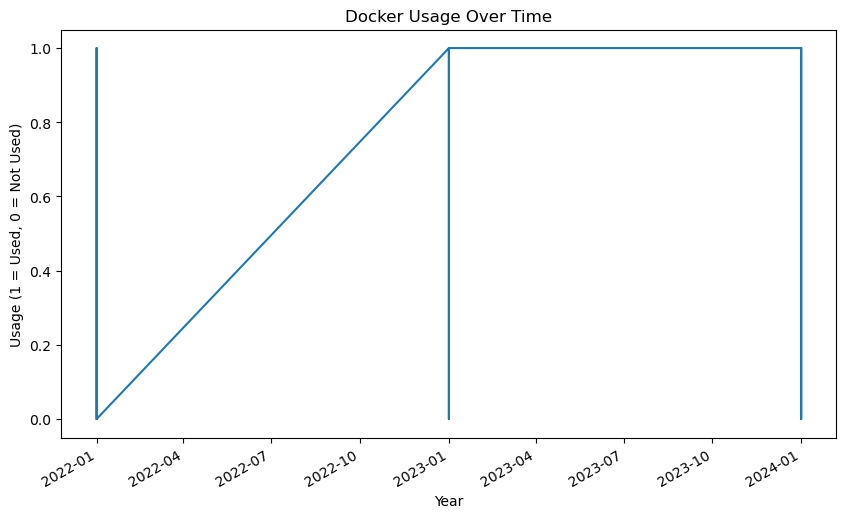

In [56]:
import pandas as pd

# Load your dataset
data = pd.read_csv('StackOverflow_cleaned_datafile.csv', low_memory=False)

# Convert 'Year' column to datetime (if not already)
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Set 'Year' as the index
data = data.set_index('Year')

# Replace NaN with an empty string for processing
data['ToolsTechHaveWorkedWith'] = data['ToolsTechHaveWorkedWith'].fillna('No Tool used')

# Split the tool strings by ';' and convert them to lists
data['ToolsList'] = data['ToolsTechHaveWorkedWith'].apply(lambda x: x.split(';') if isinstance(x, str) else [])

# Get the unique tools across all rows
all_tools = set([tool for sublist in data['ToolsList'] for tool in sublist])
print(f"All unique tools: {all_tools}")

# Create a column for each tool, indicating whether it was used (1) or not (0)
for tool in all_tools:
    data[tool] = data['ToolsList'].apply(lambda tools: 1 if tool in tools else 0)

# Now you can check the new columns with tool usage
print(data[['ToolsTechHaveWorkedWith', *all_tools]].head())

# Visualize the usage of a specific tool, e.g., 'Docker'
data['Docker'].plot(figsize=(10, 6))
plt.title('Docker Usage Over Time')
plt.xlabel('Year')
plt.ylabel('Usage (1 = Used, 0 = Not Used)')
plt.show()


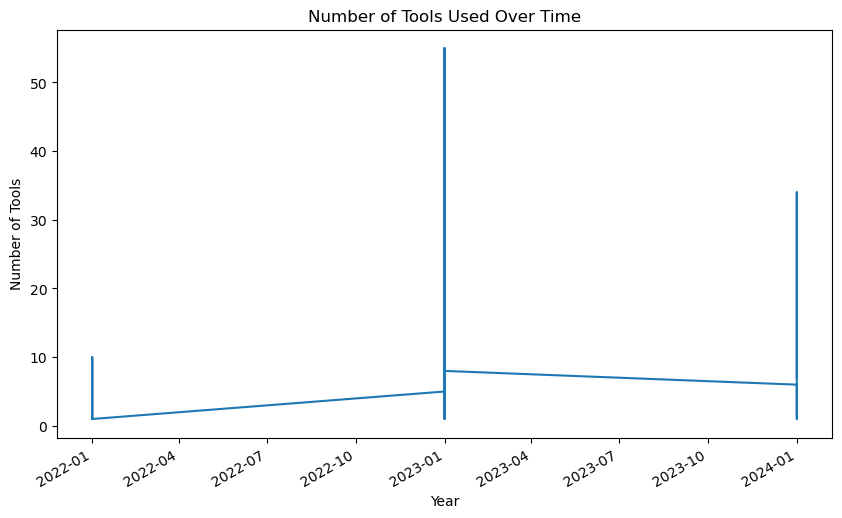

In [57]:
# Count the number of tools used in each row (length of the list)
data['ToolsCount'] = data['ToolsList'].apply(len)

# Visualize the count of tools used over time
data['ToolsCount'].plot(figsize=(10, 6))
plt.title('Number of Tools Used Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Tools')
plt.show()

All unique tools: {'tunit', 'Pacman', 'Ninja', 'Composer', 'NuGet', 'doctest', 'pnpm', 'CUTE', 'ELFspy', 'Chocolatey', 'Docker', 'Ant', 'Godot', 'npm', 'Catch2', 'Boost.Test', 'Google Test', 'Pulumi', 'Yarn', 'no tool', 'Chef', 'Cargo', 'Podman', 'MSBuild', 'APT', 'Meson', 'cppunit', 'Unity 3D', 'Visual Studio Solution', 'build2', 'Webpack', 'Bun', 'SCons', "LLVM's Clang", 'Ansible', 'Maven (build tool)', 'Nix', 'bandit', 'snitch', 'CMake', 'Vite', 'Terraform', 'Pip', 'Dagger', 'Flow', 'lest', 'Unreal Engine', 'Gradle', 'Kubernetes', 'liblittletest', 'Wasmer', 'GNU GCC', 'MSVC', 'QMake', 'Puppet', 'Make', 'Homebrew'}
                         ToolsTechHaveWorkedWith  tunit  Pacman  Ninja  \
Year                                                                     
2022-01-01                               no tool      0       0      0   
2022-01-01                                Docker      0       0      0   
2022-01-01  Docker;Kubernetes;npm;Terraform;Yarn      0       0      0   
2022-

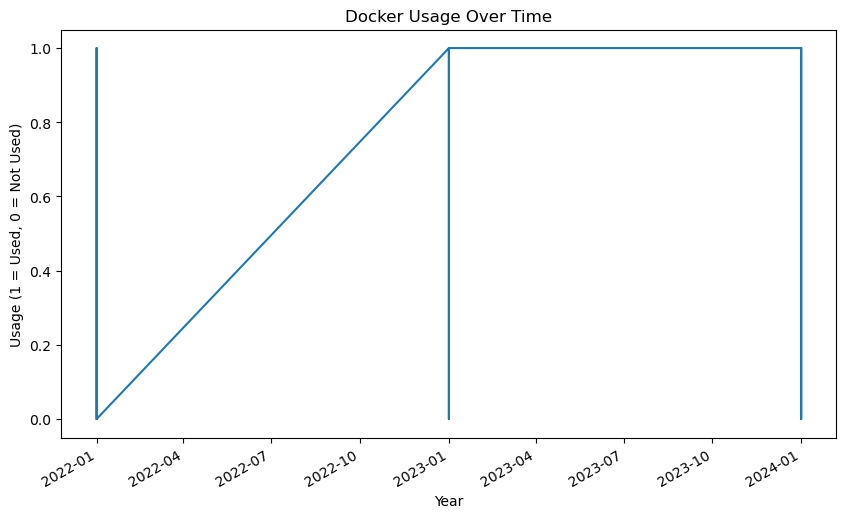

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load your dataset
data = pd.read_csv('StackOverflow_cleaned_datafile.csv', low_memory=False)

# Step 2: Convert 'Year' column to datetime (if not already)
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Step 3: Set 'Year' as the index
data = data.set_index('Year')

# Step 4: Replace NaN values in 'ToolsTechHaveWorkedWith' with an empty string for easier processing
data['ToolsTechHaveWorkedWith'] = data['ToolsTechHaveWorkedWith'].fillna('no tool')

# Step 5: Split the tool strings by ';' and convert them to lists
data['ToolsList'] = data['ToolsTechHaveWorkedWith'].apply(lambda x: x.split(';') if isinstance(x, str) else [])

# Step 6: Get the unique tools across all rows
all_tools = set([tool for sublist in data['ToolsList'] for tool in sublist])
print(f"All unique tools: {all_tools}")

# Step 7: Create a column for each tool, indicating whether it was used (1) or not (0)
for tool in all_tools:
    data[tool] = data['ToolsList'].apply(lambda tools: 1 if tool in tools else 0)

# Step 8: Check the new dataframe with tool usage
print(data[['ToolsTechHaveWorkedWith', *all_tools]].head())

# Step 9: Visualize the usage of a specific tool, e.g., 'Docker'
data['Docker'].plot(figsize=(10, 6))
plt.title('Docker Usage Over Time')
plt.xlabel('Year')
plt.ylabel('Usage (1 = Used, 0 = Not Used)')
plt.show()

# Step 10: You can repeat the visualization for any other tool by replacing 'Docker' with the tool name


In [61]:
# Check available columns in the data
print(data.columns)


Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'YearsCodePro', 'DevType', 'OrgSize',
       'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
       'WebframeHaveWorkedWith', 'MiscTechHaveWorkedWith',
       'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'Blockchain',
       'NEWSOSites', 'Age', 'TBranch', 'ICorPM', 'WorkExp', 'ProfessionalTech',
       'ConvertedCompYearly', 'New_currency', 'Amount_USD', 'AIThreat',
       'Frustration', 'JobStTeamDrivingStgy', 'OverallRoleSat',
       'AIDevHaveWorkedWith', 'AIBen', 'AIToolCurrently Using', 'Industry',
       'EmbeddedHaveWorkedWith', 'AISearchDevHaveWorkedWith', 'Amount_in__USD',
       'Amount_numeric'],
      dtype='object')


In [62]:
import pandas as pd

# Load the dataset
data = pd.read_csv('StackOverflow_cleaned_datafile.csv', low_memory=False)

# Convert 'Year' column to datetime (if not already)
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Set 'Year' as the index
data = data.set_index('Year')

# Replace NaN values in 'ToolsTechHaveWorkedWith' with empty strings for easier processing
data['ToolsTechHaveWorkedWith'] = data['ToolsTechHaveWorkedWith'].fillna('')

# Step 1: Split the tool strings by ';' and convert them to lists
data['ToolsList'] = data['ToolsTechHaveWorkedWith'].apply(lambda x: x.split(';') if isinstance(x, str) else [])

# Step 2: Get the unique tools across all rows
all_tools = set([tool for sublist in data['ToolsList'] for tool in sublist])
print(f"All unique tools: {all_tools}")

# Step 3: Create a column for each tool, indicating whether it was used (1) or not (0)
for tool in all_tools:
    data[tool] = data['ToolsList'].apply(lambda tools: 1 if tool in tools else 0)

# Step 4: Check the new dataframe with tool usage
print(data[['ToolsTechHaveWorkedWith', *all_tools]].head())

# Now check if 'Docker' exists in the columns
if 'Docker' in data.columns:
    print("Docker column exists.")
else:
    print("Docker column does not exist.")


All unique tools: {'', 'Pacman', 'Ninja', 'Composer', 'NuGet', 'doctest', 'pnpm', 'tunit', 'CUTE', 'ELFspy', 'Chocolatey', 'Docker', 'Ant', 'Godot', 'npm', 'Catch2', 'Boost.Test', 'Google Test', 'Pulumi', 'Yarn', 'Chef', 'Cargo', 'Podman', 'MSBuild', 'APT', 'Meson', 'cppunit', 'Unity 3D', 'Visual Studio Solution', 'build2', 'Webpack', 'Bun', 'SCons', "LLVM's Clang", 'Ansible', 'Maven (build tool)', 'Nix', 'bandit', 'snitch', 'CMake', 'Vite', 'Terraform', 'Pip', 'Dagger', 'Flow', 'lest', 'Unreal Engine', 'Gradle', 'Kubernetes', 'liblittletest', 'Wasmer', 'GNU GCC', 'MSVC', 'QMake', 'Puppet', 'Make', 'Homebrew'}
                         ToolsTechHaveWorkedWith     Pacman  Ninja  Composer  \
Year                                                                           
2022-01-01                                        1       0      0         0   
2022-01-01                                Docker  0       0      0         0   
2022-01-01  Docker;Kubernetes;npm;Terraform;Yarn  0       0   

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
data = pd.read_csv('StackOverflow_cleaned_datafile.csv', low_memory=False)

# Convert 'Year' column to datetime (if not already)
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Set 'Year' as the index
data = data.set_index('Year')

# Make sure that the 'Docker' column exists
if 'Docker' not in data.columns:
    print("Docker column does not exist!")
else:
    # Step 1: Check for stationarity using the Augmented Dickey-Fuller test
    docker_usage = data['Docker']

    result = adfuller(docker_usage.dropna())
    print(f"ADF Test p-value for Docker: {result[1]}")

    # If the p-value > 0.05, the data is non-stationary and needs differencing.
    if result[1] > 0.05:
        print("Data is non-stationary, applying differencing...")
        docker_usage = docker_usage.diff().dropna()  # First differencing to make stationary

    # Step 2: Plot ACF and PACF to determine p, d, q parameters
    plot_acf(docker_usage)
    plt.title('ACF for Docker')
    plt.show()

    plot_pacf(docker_usage)
    plt.title('PACF for Docker')
    plt.show()

    # Step 3: Fit the ARIMA model (adjust p, d, q based on ACF/PACF plots)
    model = ARIMA(docker_usage, order=(1, 1, 1))  # Example: Adjust (p, d, q) after inspecting the plots
    model_fit = model.fit()

    # Step 4: Model Summary
    print(model_fit.summary())

    # Step 5: Make Forecasts (e.g., next 5 years)
    forecast_steps = 5  # Forecast the next 5 years
    forecast = model_fit.forecast(steps=forecast_steps)

    # Step 6: Plot Forecast vs Actual
    plt.figure(figsize=(10, 6))
    plt.plot(docker_usage.index, docker_usage, label='Actual')
    plt.plot(pd.date_range(docker_usage.index[-1], periods=forecast_steps + 1, freq='A')[1:], forecast, label='Forecast', color='red')
    plt.legend()
    plt.title('Forecasting Docker Usage')
    plt.xlabel('Year')
    plt.ylabel('Docker Usage (1 = Used, 0 = Not Used)')
    plt.show()


Docker column does not exist!


In [64]:
print(data.columns)


Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'YearsCodePro', 'DevType', 'OrgSize',
       'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
       'WebframeHaveWorkedWith', 'MiscTechHaveWorkedWith',
       'ToolsTechHaveWorkedWith', 'NEWCollabToolsHaveWorkedWith',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'Blockchain',
       'NEWSOSites', 'Age', 'TBranch', 'ICorPM', 'WorkExp', 'ProfessionalTech',
       'ConvertedCompYearly', 'New_currency', 'Amount_USD', 'AIThreat',
       'Frustration', 'JobStTeamDrivingStgy', 'OverallRoleSat',
       'AIDevHaveWorkedWith', 'AIBen', 'AIToolCurrently Using', 'Industry',
       'EmbeddedHaveWorkedWith', 'AISearchDevHaveWorkedWith', 'Amount_in__USD',
       'Amount_numeric'],
      dtype='object')


In [65]:
# Check if 'Docker' is present in any of the 'ToolsTechHaveWorkedWith' entries
docker_present = data['ToolsTechHaveWorkedWith'].str.contains('Docker', na=False)
print(f"Is 'Docker' present in the dataset? {docker_present.any()}")

# Optionally, create a binary column indicating if Docker was used
data['Docker'] = docker_present.astype(int)

# Check the new column
print(data[['ToolsTechHaveWorkedWith', 'Docker']].head())


Is 'Docker' present in the dataset? True
                         ToolsTechHaveWorkedWith  Docker
Year                                                    
2022-01-01                                   NaN       0
2022-01-01                                Docker       1
2022-01-01  Docker;Kubernetes;npm;Terraform;Yarn       1
2022-01-01                                   NaN       0
2022-01-01                                   NaN       0


ADF Test p-value for Docker: 0.0


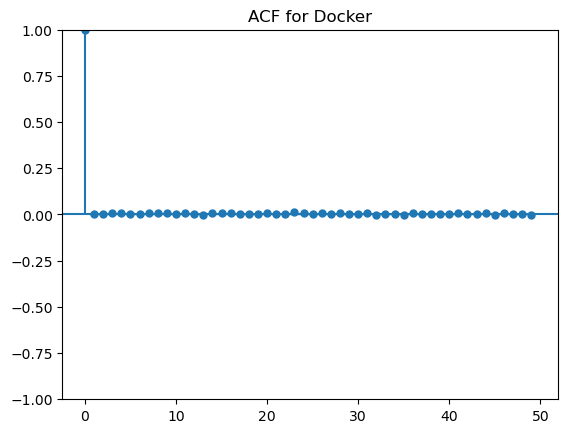

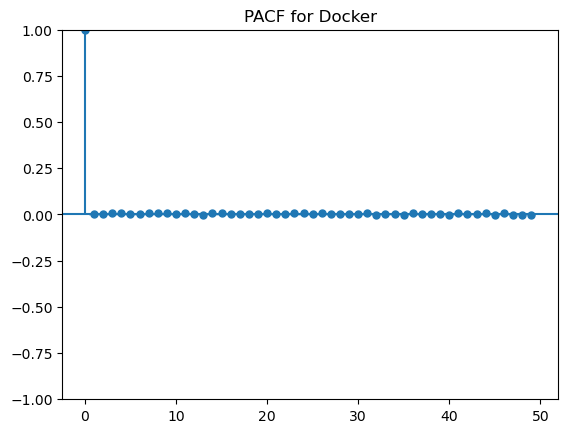

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                 Docker   No. Observations:                78890
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -57212.820
Date:                Wed, 12 Mar 2025   AIC                         114431.640
Time:                        15:29:40   BIC                         114459.467
Sample:                             0   HQIC                        114440.176
                              - 78890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0009      0.004     -0.256      0.798      -0.008       0.006
ma.L1         -0.9981      0.000  -3683.060      0.000      -0.999      -0.998
sigma2         0.2497      0.019     12.979      0.0

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/var/folders/72/g8b973ks1y38yc2wxw93g03m0000gn/T/ipykernel_30134/390344162.py:55: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



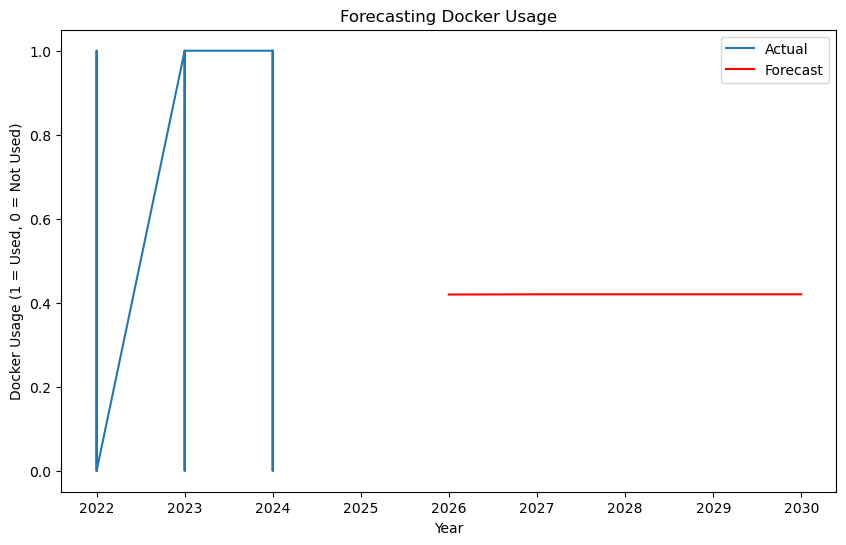

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
data = pd.read_csv('StackOverflow_cleaned_datafile.csv', low_memory=False)

# Convert 'Year' column to datetime (if not already)
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Set 'Year' as the index
data = data.set_index('Year')

# Step 1: Create the binary 'Docker' column
docker_present = data['ToolsTechHaveWorkedWith'].str.contains('Docker', na=False)
data['Docker'] = docker_present.astype(int)

# Step 2: Check for stationarity using the Augmented Dickey-Fuller test
docker_usage = data['Docker']

result = adfuller(docker_usage.dropna())
print(f"ADF Test p-value for Docker: {result[1]}")

# If the p-value > 0.05, the data is non-stationary and needs differencing.
if result[1] > 0.05:
    print("Data is non-stationary, applying differencing...")
    docker_usage = docker_usage.diff().dropna()  # First differencing to make stationary

# Step 3: Plot ACF and PACF to determine p, d, q parameters
plot_acf(docker_usage)
plt.title('ACF for Docker')
plt.show()

plot_pacf(docker_usage)
plt.title('PACF for Docker')
plt.show()

# Step 4: Fit the ARIMA model (adjust p, d, q based on ACF/PACF plots)
model = ARIMA(docker_usage, order=(1, 1, 1))  # Example: Adjust (p, d, q) after inspecting the plots
model_fit = model.fit()

# Step 5: Model Summary
print(model_fit.summary())

# Step 6: Make Forecasts (e.g., next 5 years)
forecast_steps = 5  # Forecast the next 5 years
forecast = model_fit.forecast(steps=forecast_steps)

# Step 7: Plot Forecast vs Actual
plt.figure(figsize=(10, 6))
plt.plot(docker_usage.index, docker_usage, label='Actual')
plt.plot(pd.date_range(docker_usage.index[-1], periods=forecast_steps + 1, freq='A')[1:], forecast, label='Forecast', color='red')
plt.legend()
plt.title('Forecasting Docker Usage')
plt.xlabel('Year')
plt.ylabel('Docker Usage (1 = Used, 0 = Not Used)')
plt.show()


Since the ADF test p-value for Docker is 0.0, this means that the time series for Docker is stationary and doesn't require any differencing


Forecasting for Docker...
ADF Test p-value for Docker: 0.0


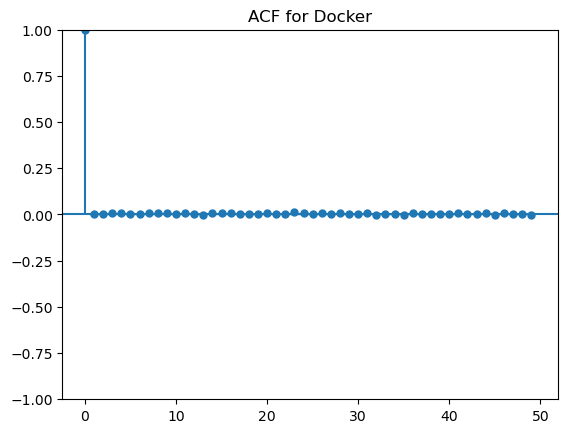

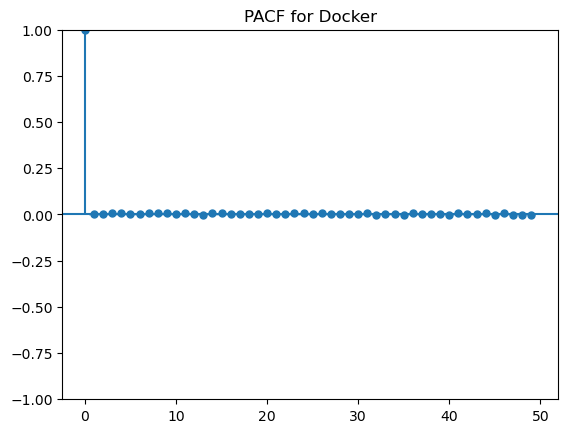

                               SARIMAX Results                                
Dep. Variable:                 Docker   No. Observations:                78890
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -57256.477
Date:                Wed, 12 Mar 2025   AIC                         114520.954
Time:                        16:20:27   BIC                         114558.057
Sample:                             0   HQIC                        114532.335
                              - 78890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5025      0.601      0.836      0.403      -0.675       1.680
ar.L1          0.0011      1.708      0.001      0.999      -3.347       3.350
ma.L1          0.0011      1.632      0.001      0.9

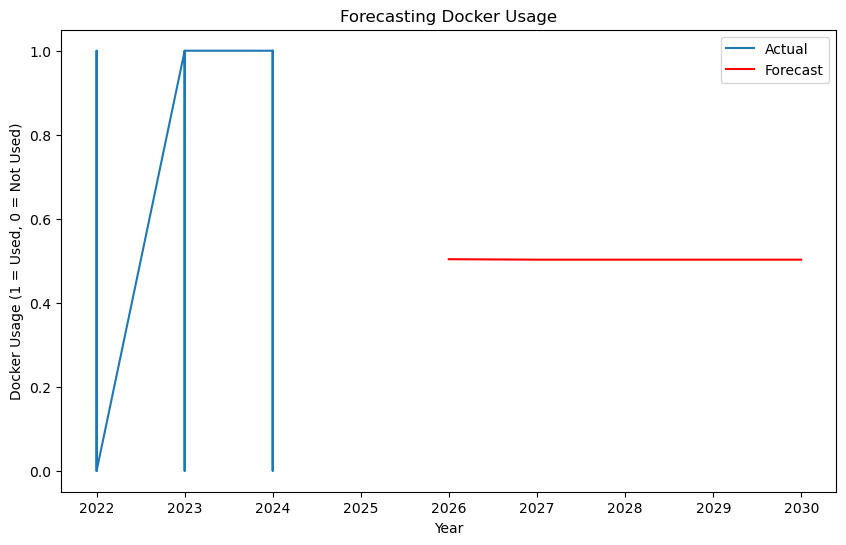


Forecasting for Kubernetes...
ADF Test p-value for Kubernetes: 0.0


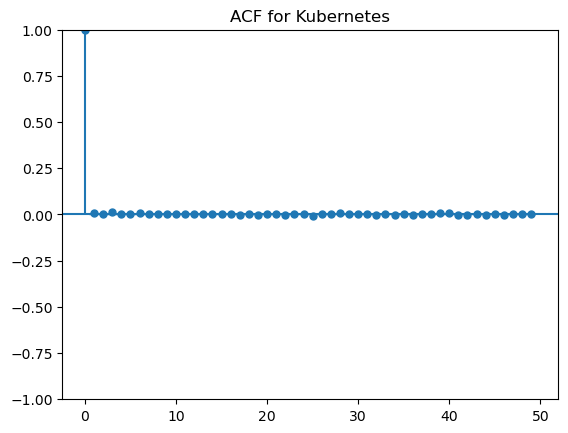

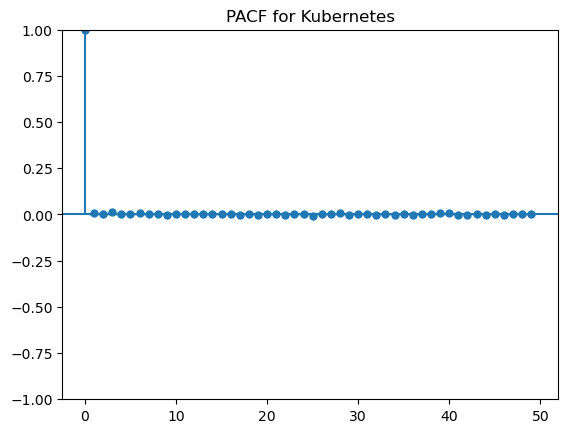

                               SARIMAX Results                                
Dep. Variable:             Kubernetes   No. Observations:                78890
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -38016.819
Date:                Wed, 12 Mar 2025   AIC                          76041.638
Time:                        16:21:06   BIC                          76078.742
Sample:                             0   HQIC                         76053.020
                              - 78890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1896      0.050      3.814      0.000       0.092       0.287
ar.L1          0.9989      0.000   2195.904      0.000       0.998       1.000
ma.L1         -0.9976      0.001  -1523.769      0.0

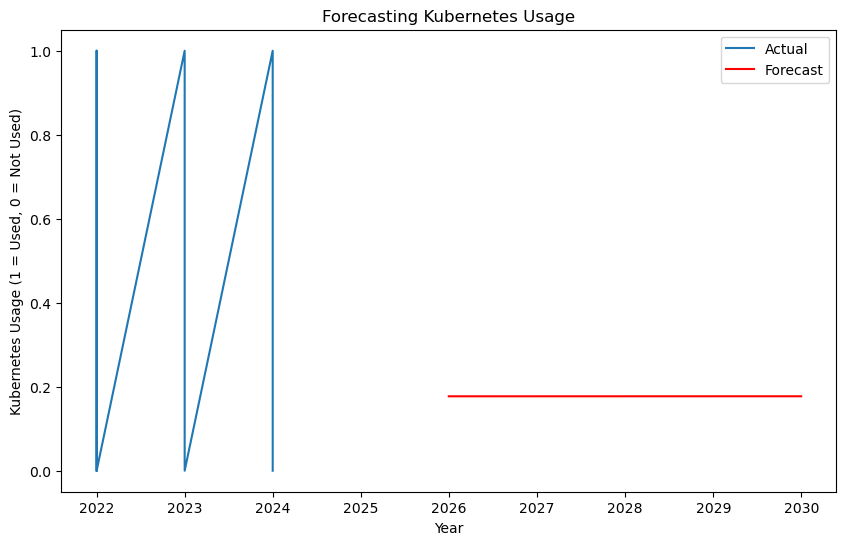


Forecasting for npm...
ADF Test p-value for npm: 0.0


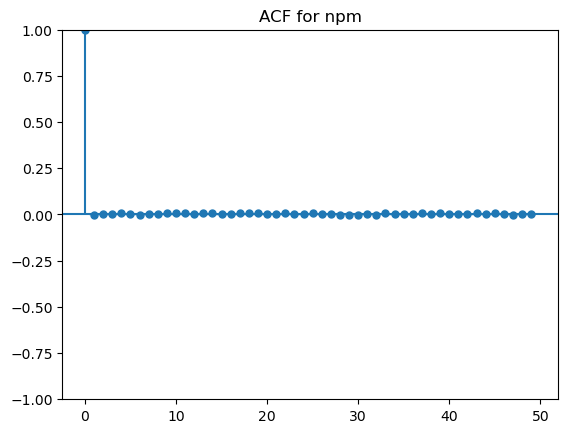

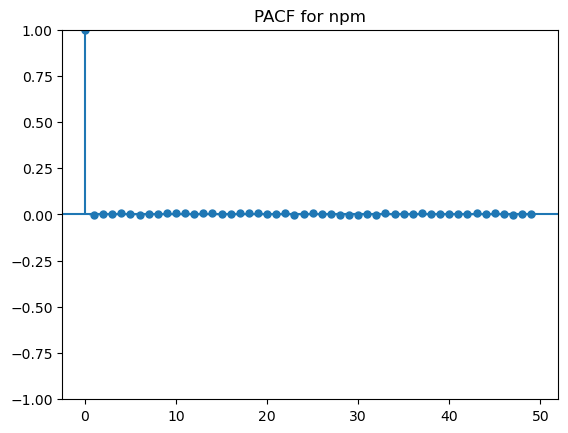

                               SARIMAX Results                                
Dep. Variable:                    npm   No. Observations:                78890
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -57208.068
Date:                Wed, 12 Mar 2025   AIC                         114424.136
Time:                        16:21:25   BIC                         114461.240
Sample:                             0   HQIC                        114435.518
                              - 78890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4823      1.923      0.251      0.802      -3.286       4.251
ar.L1         -0.0004      3.952     -0.000      1.000      -7.746       7.745
ma.L1         -0.0005      3.950     -0.000      1.0

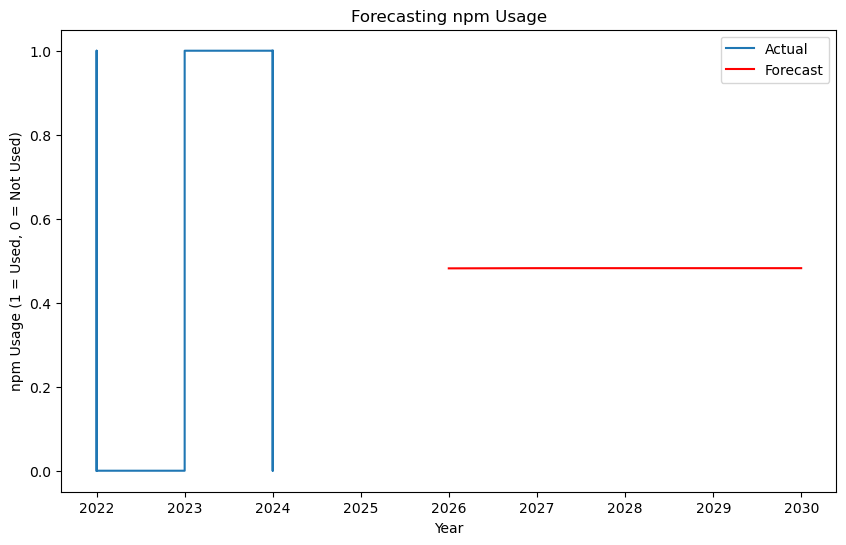


Forecasting for Terraform...
ADF Test p-value for Terraform: 0.0


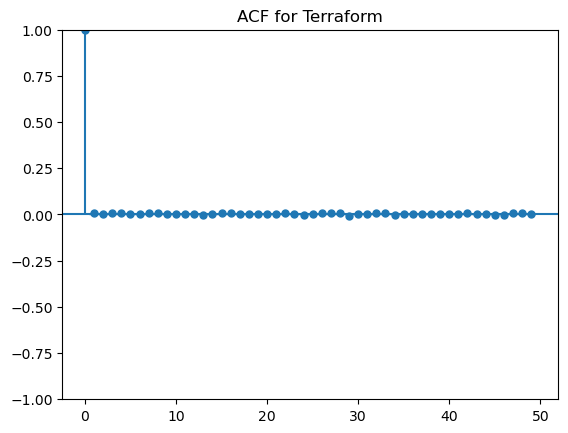

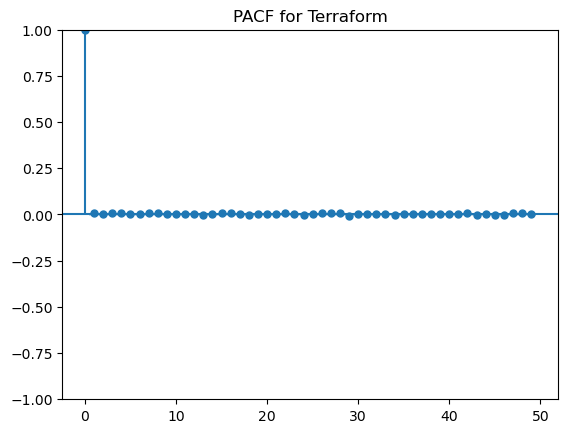

                               SARIMAX Results                                
Dep. Variable:              Terraform   No. Observations:                78890
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -21132.720
Date:                Wed, 12 Mar 2025   AIC                          42273.440
Time:                        16:21:47   BIC                          42310.544
Sample:                             0   HQIC                         42284.822
                              - 78890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1128      0.079      1.420      0.156      -0.043       0.268
ar.L1          0.7523      0.105      7.176      0.000       0.547       0.958
ma.L1         -0.7425      0.107     -6.967      0.0

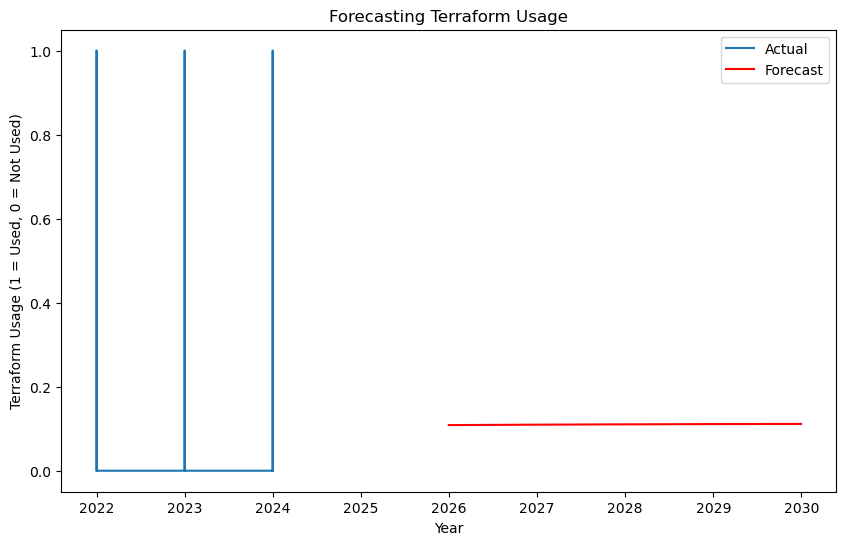


Forecasting for Yarn...
ADF Test p-value for Yarn: 0.0


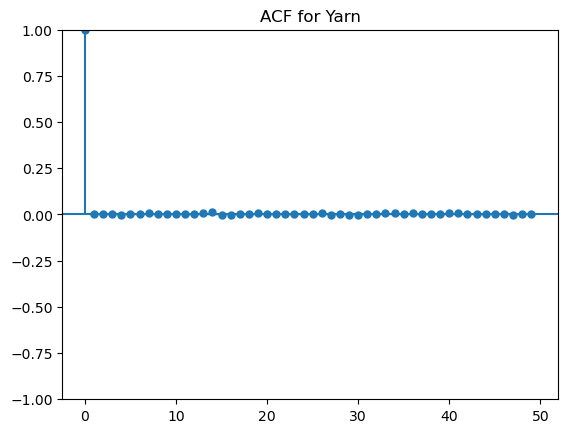

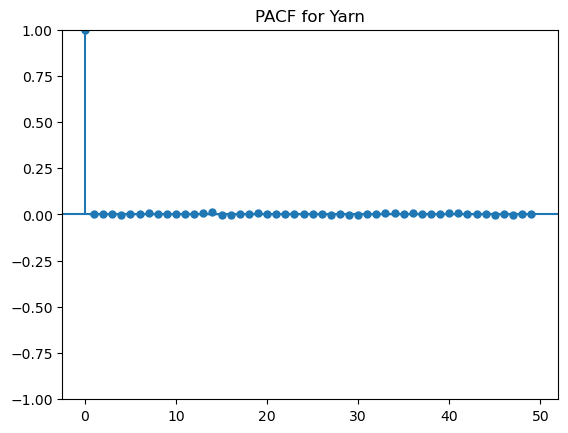

                               SARIMAX Results                                
Dep. Variable:                   Yarn   No. Observations:                78890
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -40608.017
Date:                Wed, 12 Mar 2025   AIC                          81224.033
Time:                        16:22:07   BIC                          81261.137
Sample:                             0   HQIC                         81235.415
                              - 78890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2066      0.488      0.424      0.672      -0.749       1.162
ar.L1          0.0015      1.195      0.001      0.999      -2.340       2.343
ma.L1          0.0015      1.195      0.001      0.9

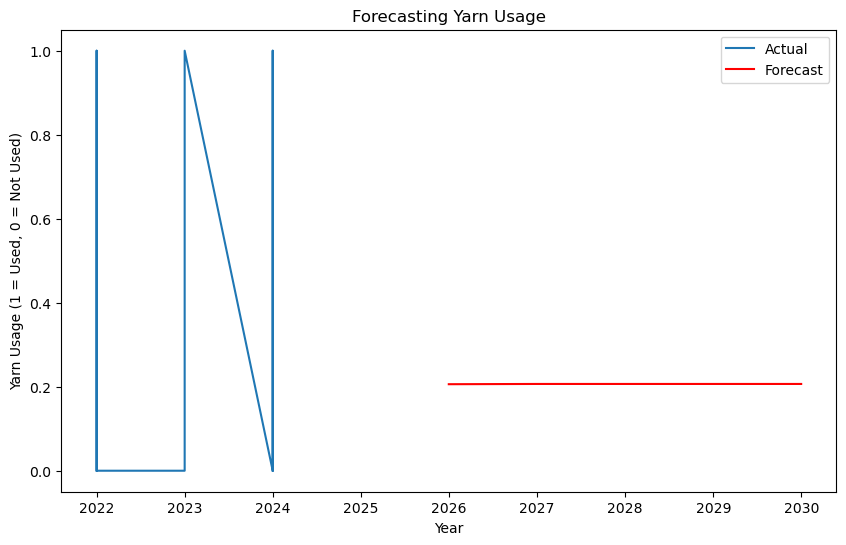


Forecasting for Unity 3D...
ADF Test p-value for Unity 3D: 0.0


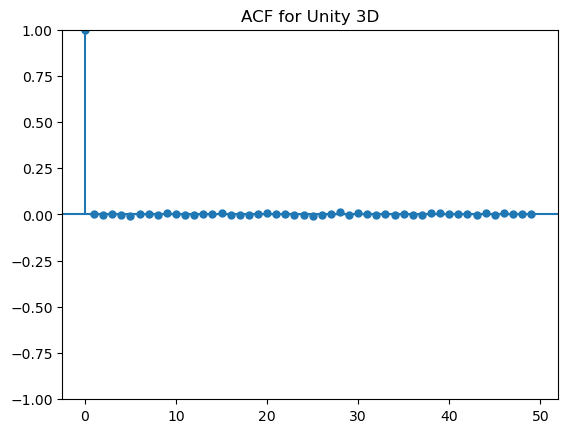

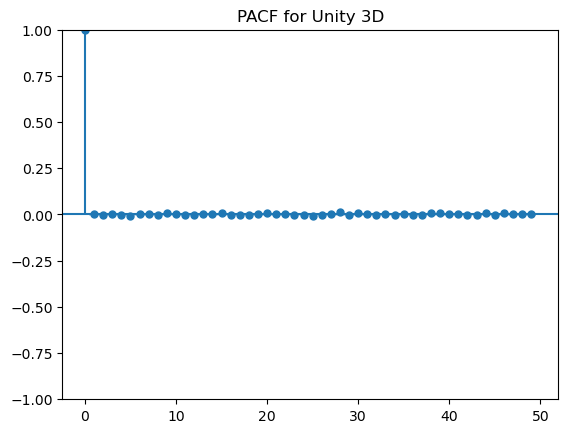

                               SARIMAX Results                                
Dep. Variable:               Unity 3D   No. Observations:                78890
Model:                 ARIMA(1, 0, 1)   Log Likelihood               10313.059
Date:                Wed, 12 Mar 2025   AIC                         -20618.117
Time:                        16:22:29   BIC                         -20581.014
Sample:                             0   HQIC                        -20606.736
                              - 78890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0473      0.205      0.231      0.817      -0.354       0.449
ar.L1         -0.8533      0.257     -3.326      0.001      -1.356      -0.350
ma.L1          0.8552      0.255      3.354      0.0

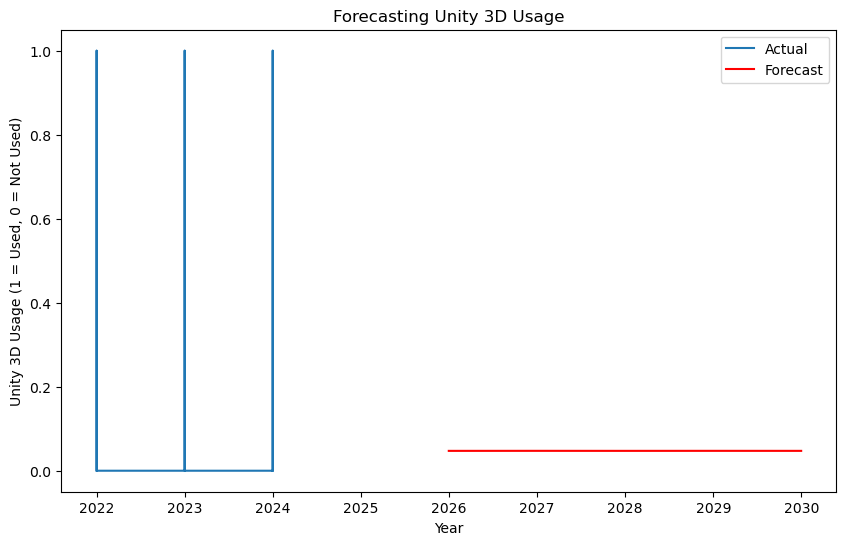


Forecasting for Homebrew...
ADF Test p-value for Homebrew: 0.0


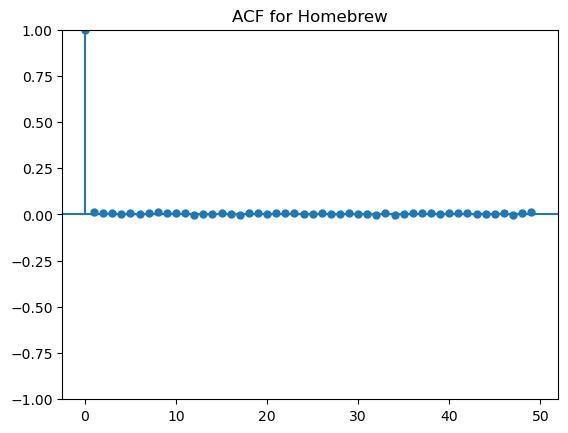

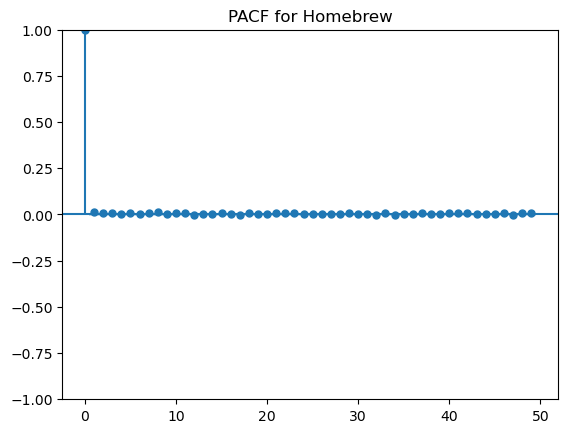

                               SARIMAX Results                                
Dep. Variable:               Homebrew   No. Observations:                78890
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -43614.999
Date:                Wed, 12 Mar 2025   AIC                          87237.997
Time:                        16:23:04   BIC                          87275.101
Sample:                             0   HQIC                         87249.379
                              - 78890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2304      0.058      3.951      0.000       0.116       0.345
ar.L1          0.9965      0.001   1075.363      0.000       0.995       0.998
ma.L1         -0.9925      0.001   -816.786      0.0

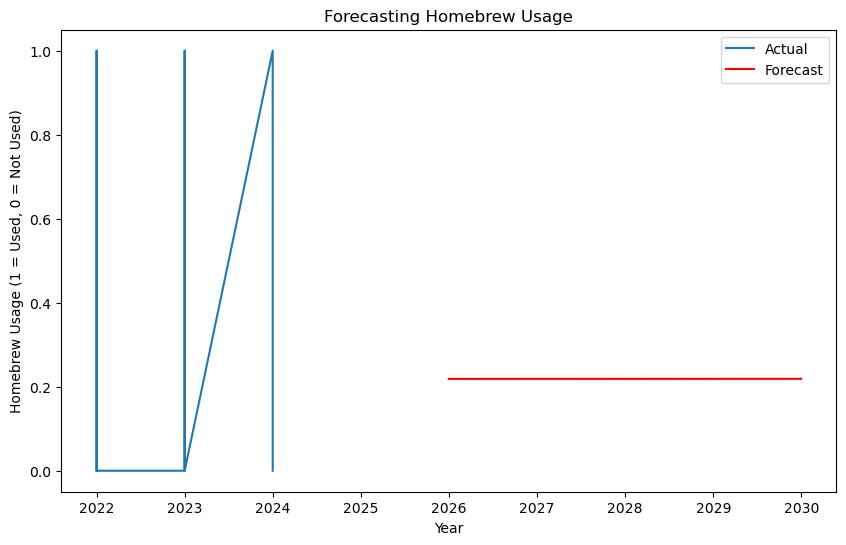

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
data = pd.read_csv('StackOverflow_cleaned_datafile.csv', low_memory=False)

# Convert 'Year' column to datetime (if not already)
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Set 'Year' as the index
data = data.set_index('Year')

# List of tools to forecast (you can add more tools to this list)
tools = ['Docker', 'Kubernetes', 'npm', 'Terraform', 'Yarn','Unity 3D','Homebrew']  # Add more tools as needed

# Loop through each tool to forecast
for tool in tools:
    print(f"\nForecasting for {tool}...")

    # Step 1: Create the binary column for each tool
    tool_present = data['ToolsTechHaveWorkedWith'].str.contains(tool, na=False)
    data[tool] = tool_present.astype(int)

    # Step 2: Check for stationarity using the Augmented Dickey-Fuller test
    tool_usage = data[tool]

    result = adfuller(tool_usage.dropna())
    print(f"ADF Test p-value for {tool}: {result[1]}")

    # Since p-value < 0.05, the data is stationary, no differencing needed.
    if result[1] > 0.05:
        print(f"Data for {tool} is non-stationary, applying differencing...")
        tool_usage = tool_usage.diff().dropna()  # First differencing to make stationary

    # Step 3: Plot ACF and PACF to determine p, d, q parameters
    plot_acf(tool_usage)
    plt.title(f'ACF for {tool}')
    plt.show()

    plot_pacf(tool_usage)
    plt.title(f'PACF for {tool}')
    plt.show()

    # Step 4: Fit the ARIMA model (order=(p, d, q))
    model = ARIMA(tool_usage, order=(1, 0, 1))  # No differencing needed if data is stationary (d=0)
    model_fit = model.fit()

    # Step 5: Model Summary
    print(model_fit.summary())

    # Step 6: Make Forecasts (e.g., next 5 years)
    forecast_steps = 5  # Forecast the next 5 years
    forecast = model_fit.forecast(steps=forecast_steps)

    # Step 7: Plot Forecast vs Actual
    plt.figure(figsize=(10, 6))
    plt.plot(tool_usage.index, tool_usage, label='Actual')
    plt.plot(pd.date_range(tool_usage.index[-1], periods=forecast_steps + 1, freq='A')[1:], forecast, label='Forecast', color='red')
    plt.legend()
    plt.title(f'Forecasting {tool} Usage')
    plt.xlabel('Year')
    plt.ylabel(f'{tool} Usage (1 = Used, 0 = Not Used)')
    plt.show()



Forecasting for Docker...
ADF Test p-value for Docker: 0.0


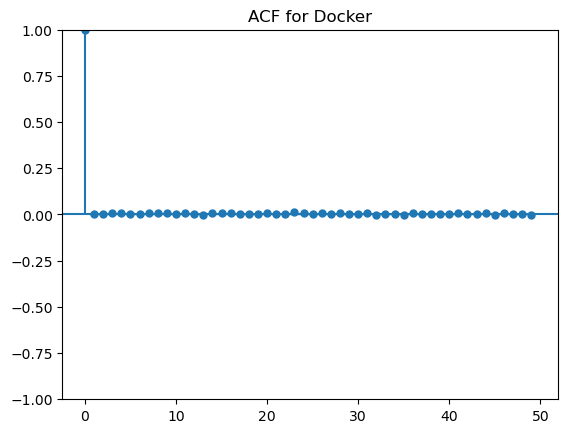

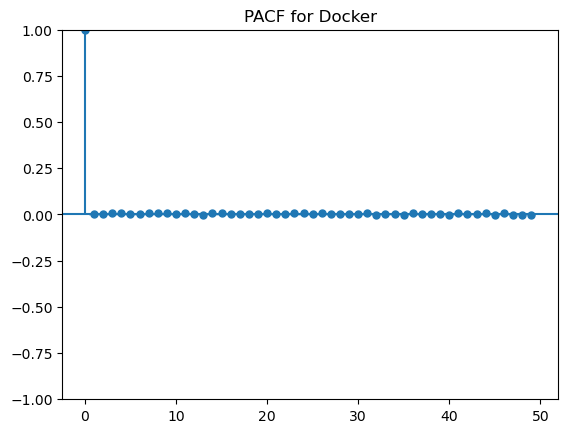

                               SARIMAX Results                                
Dep. Variable:                 Docker   No. Observations:                78890
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -57256.477
Date:                Wed, 12 Mar 2025   AIC                         114520.954
Time:                        17:03:41   BIC                         114558.057
Sample:                             0   HQIC                        114532.335
                              - 78890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5025      0.601      0.836      0.403      -0.675       1.680
ar.L1          0.0011      1.708      0.001      0.999      -3.347       3.350
ma.L1          0.0011      1.632      0.001      0.9

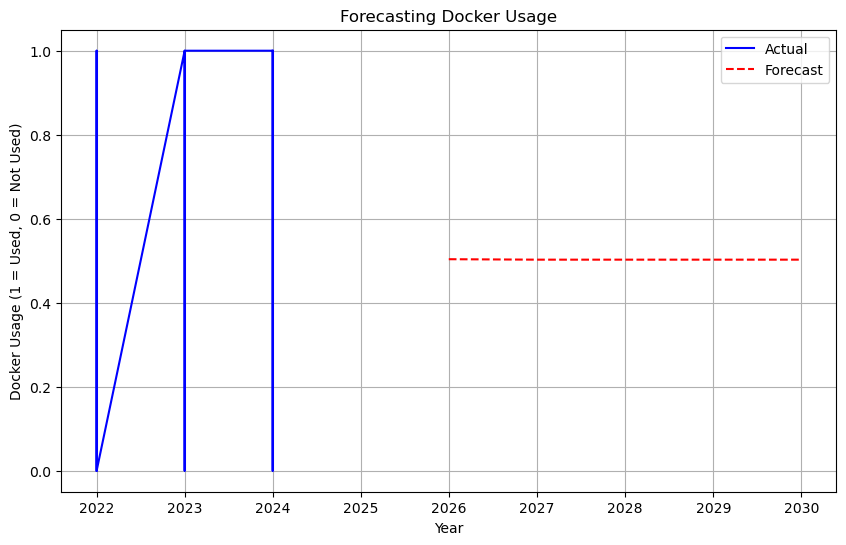


Forecasting for Kubernetes...
ADF Test p-value for Kubernetes: 0.0


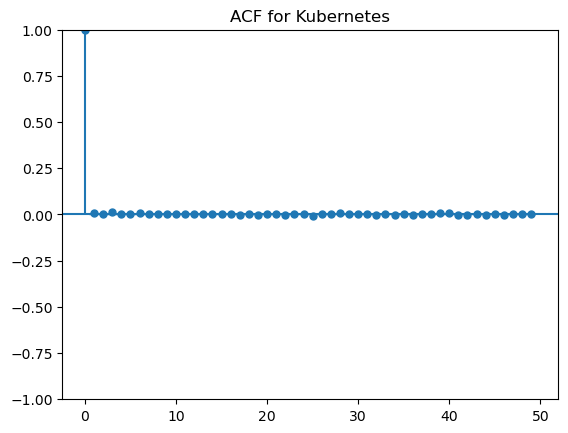

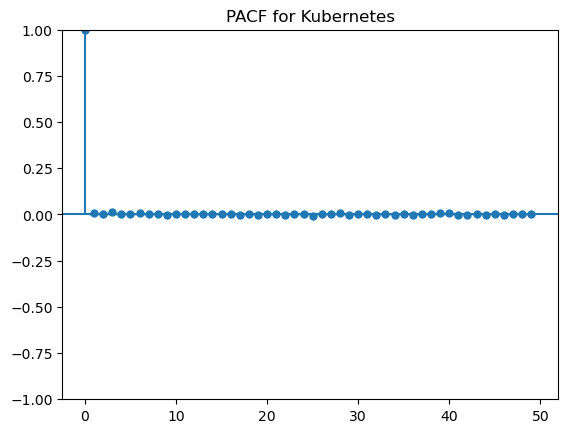

                               SARIMAX Results                                
Dep. Variable:             Kubernetes   No. Observations:                78890
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -38016.819
Date:                Wed, 12 Mar 2025   AIC                          76041.638
Time:                        17:04:19   BIC                          76078.742
Sample:                             0   HQIC                         76053.020
                              - 78890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1896      0.050      3.814      0.000       0.092       0.287
ar.L1          0.9989      0.000   2195.904      0.000       0.998       1.000
ma.L1         -0.9976      0.001  -1523.769      0.0

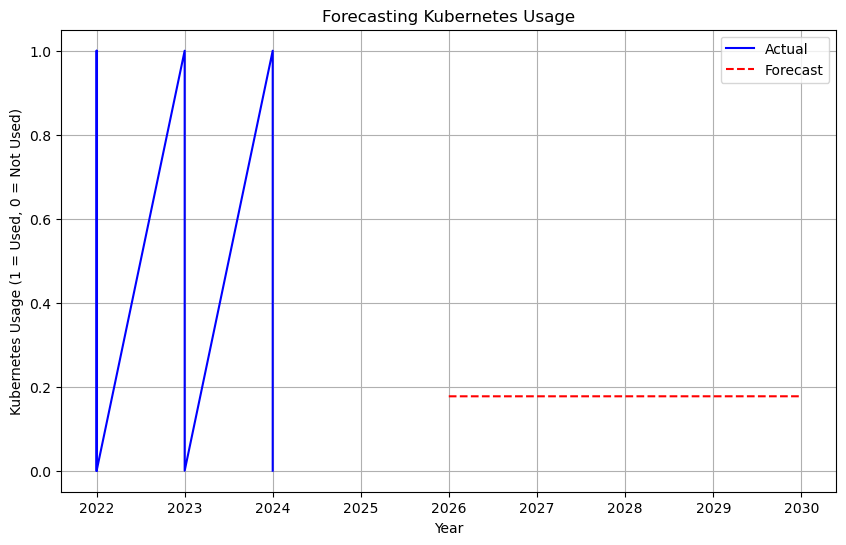


Forecasting for npm...
ADF Test p-value for npm: 0.0


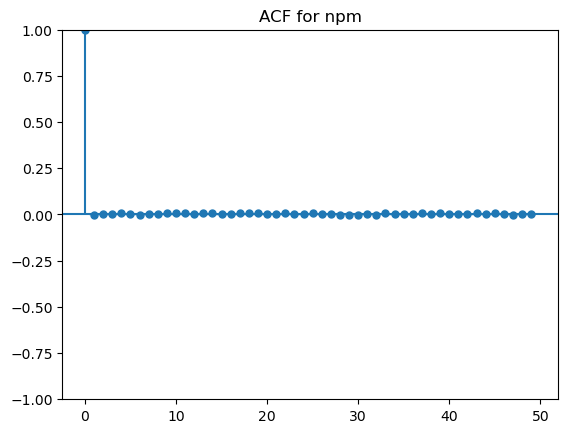

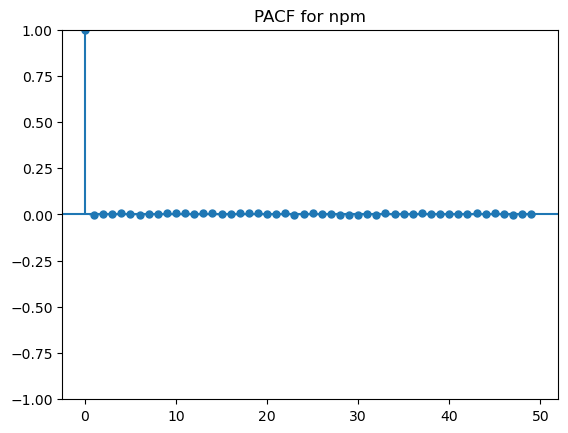

                               SARIMAX Results                                
Dep. Variable:                    npm   No. Observations:                78890
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -57208.068
Date:                Wed, 12 Mar 2025   AIC                         114424.136
Time:                        17:04:41   BIC                         114461.240
Sample:                             0   HQIC                        114435.518
                              - 78890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4823      1.923      0.251      0.802      -3.286       4.251
ar.L1         -0.0004      3.952     -0.000      1.000      -7.746       7.745
ma.L1         -0.0005      3.950     -0.000      1.0

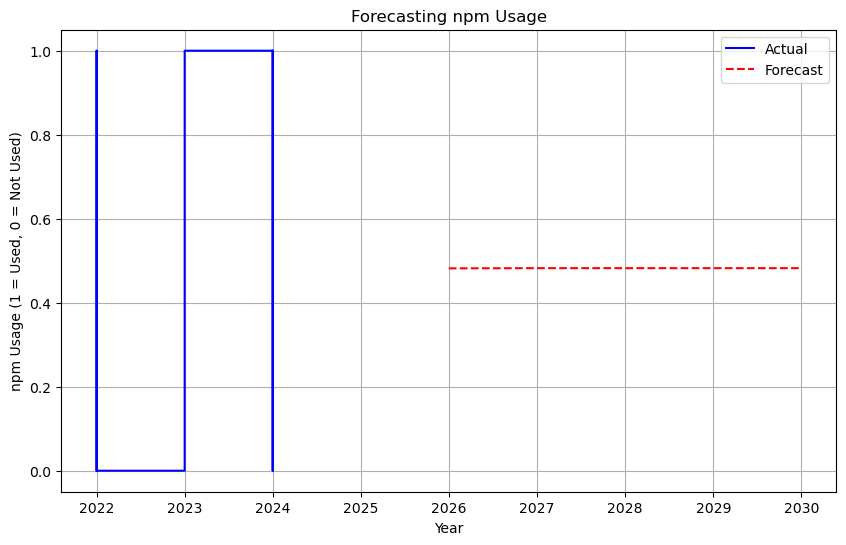


Forecasting for Terraform...
ADF Test p-value for Terraform: 0.0


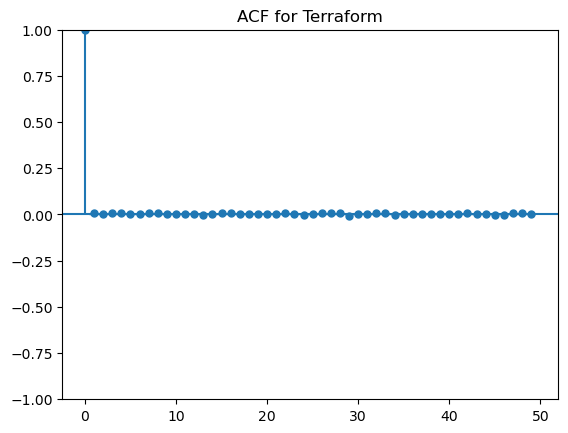

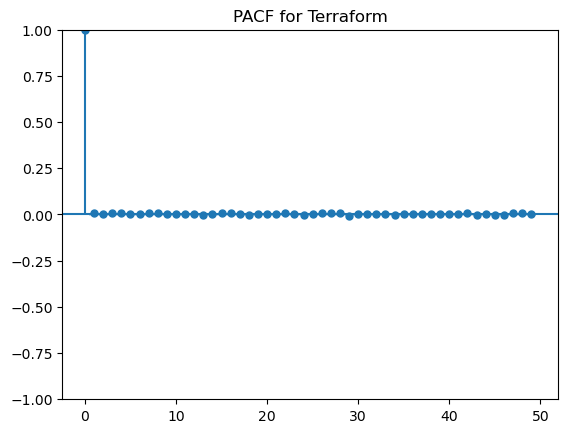

                               SARIMAX Results                                
Dep. Variable:              Terraform   No. Observations:                78890
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -21132.720
Date:                Wed, 12 Mar 2025   AIC                          42273.440
Time:                        17:05:02   BIC                          42310.544
Sample:                             0   HQIC                         42284.822
                              - 78890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1128      0.079      1.420      0.156      -0.043       0.268
ar.L1          0.7523      0.105      7.176      0.000       0.547       0.958
ma.L1         -0.7425      0.107     -6.967      0.0

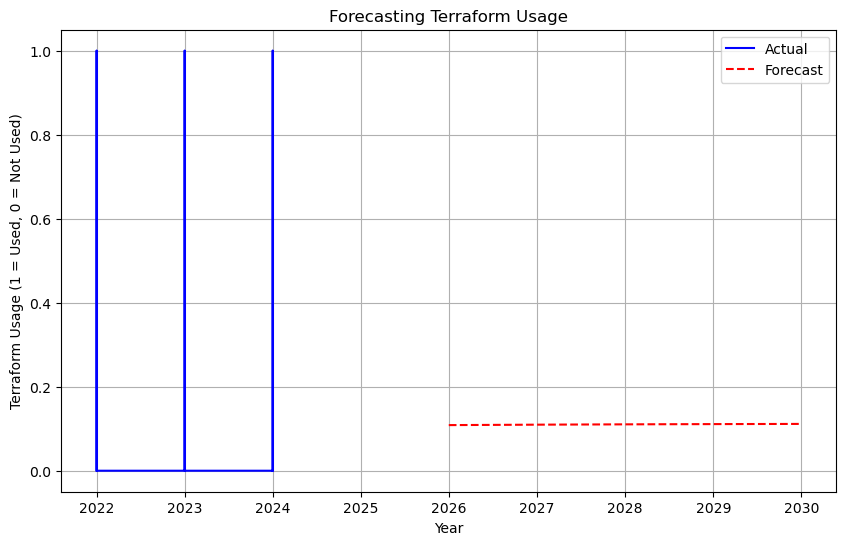


Forecasting for Yarn...
ADF Test p-value for Yarn: 0.0


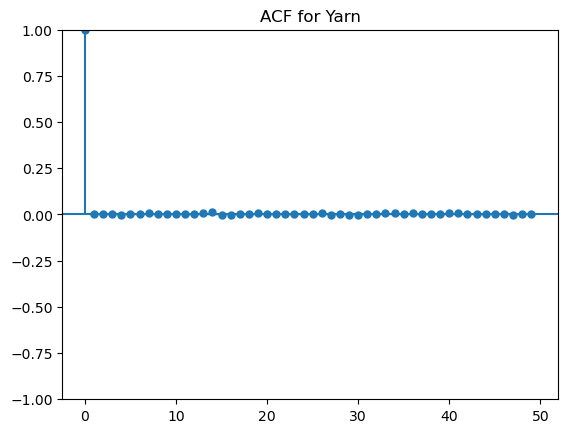

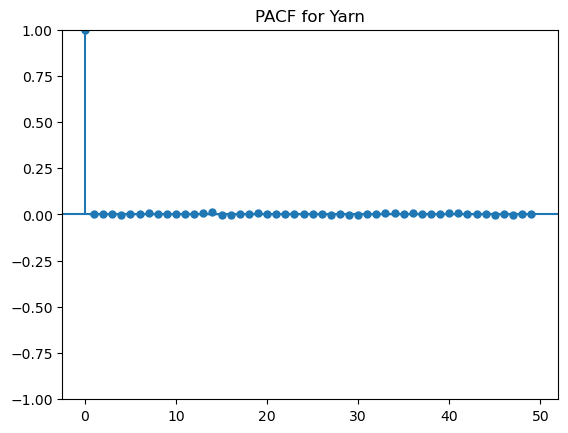

                               SARIMAX Results                                
Dep. Variable:                   Yarn   No. Observations:                78890
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -40608.017
Date:                Wed, 12 Mar 2025   AIC                          81224.033
Time:                        17:05:23   BIC                          81261.137
Sample:                             0   HQIC                         81235.415
                              - 78890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2066      0.488      0.424      0.672      -0.749       1.162
ar.L1          0.0015      1.195      0.001      0.999      -2.340       2.343
ma.L1          0.0015      1.195      0.001      0.9

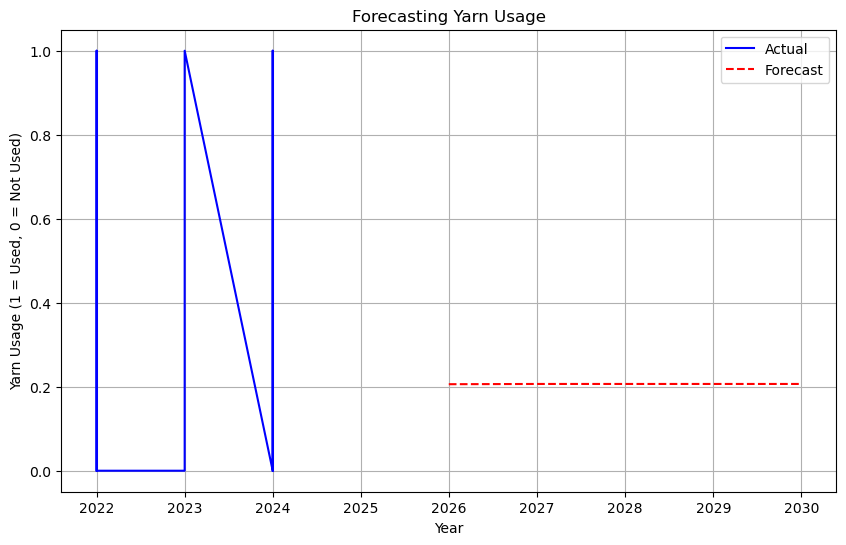


Forecasting for Unity 3D...
ADF Test p-value for Unity 3D: 0.0


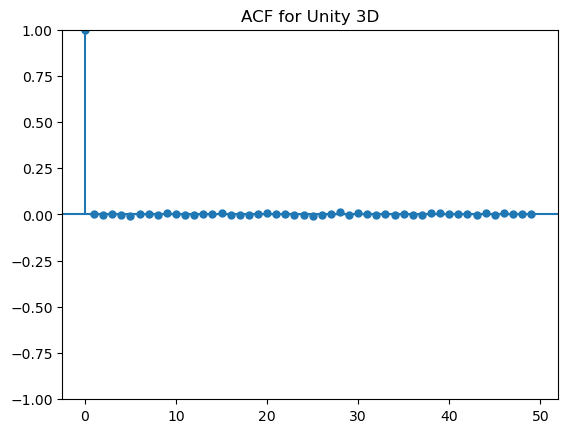

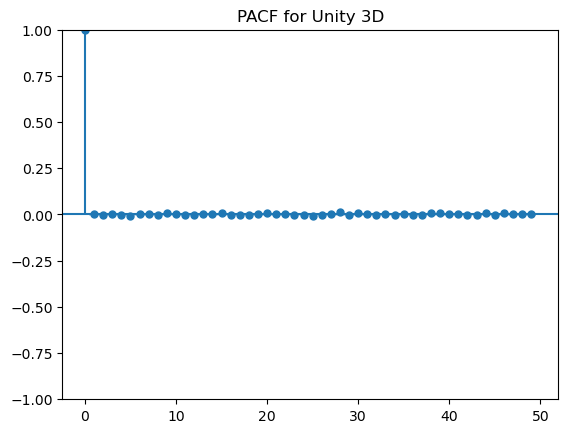

                               SARIMAX Results                                
Dep. Variable:               Unity 3D   No. Observations:                78890
Model:                 ARIMA(1, 0, 1)   Log Likelihood               10313.059
Date:                Wed, 12 Mar 2025   AIC                         -20618.117
Time:                        17:05:48   BIC                         -20581.014
Sample:                             0   HQIC                        -20606.736
                              - 78890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0473      0.205      0.231      0.817      -0.354       0.449
ar.L1         -0.8533      0.257     -3.326      0.001      -1.356      -0.350
ma.L1          0.8552      0.255      3.354      0.0

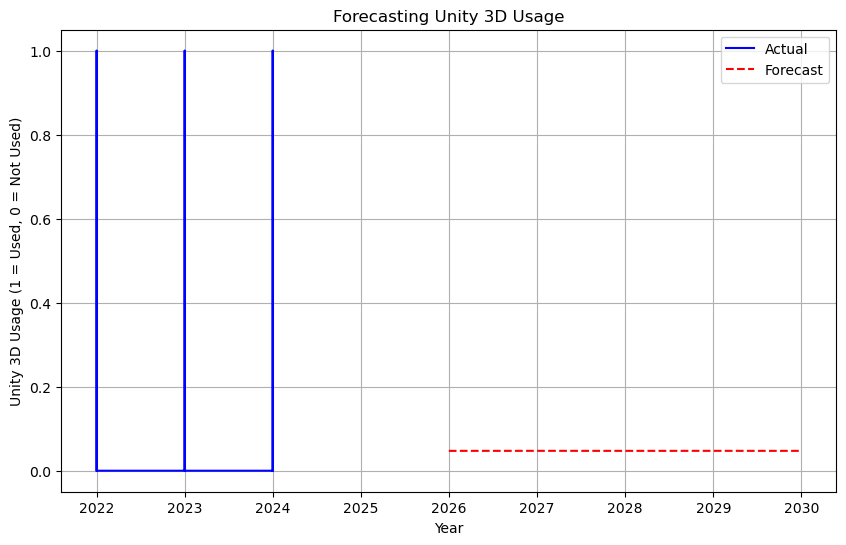


Forecasting for Homebrew...
ADF Test p-value for Homebrew: 0.0


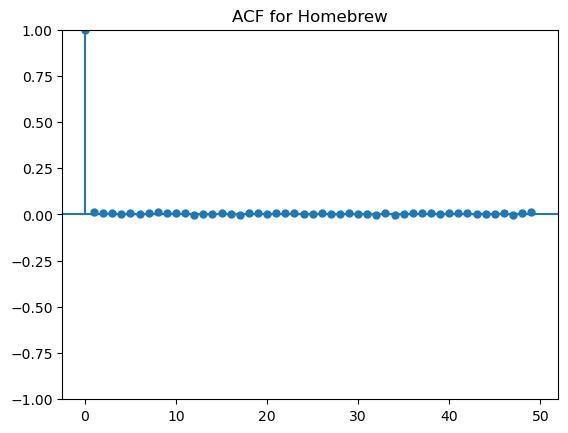

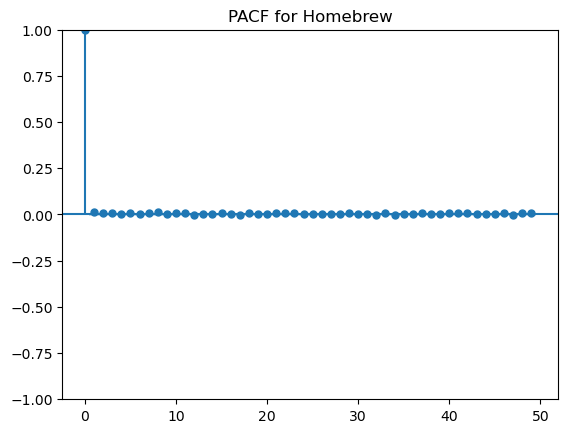

                               SARIMAX Results                                
Dep. Variable:               Homebrew   No. Observations:                78890
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -43614.999
Date:                Wed, 12 Mar 2025   AIC                          87237.997
Time:                        17:06:26   BIC                          87275.101
Sample:                             0   HQIC                         87249.379
                              - 78890                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2304      0.058      3.951      0.000       0.116       0.345
ar.L1          0.9965      0.001   1075.363      0.000       0.995       0.998
ma.L1         -0.9925      0.001   -816.786      0.0

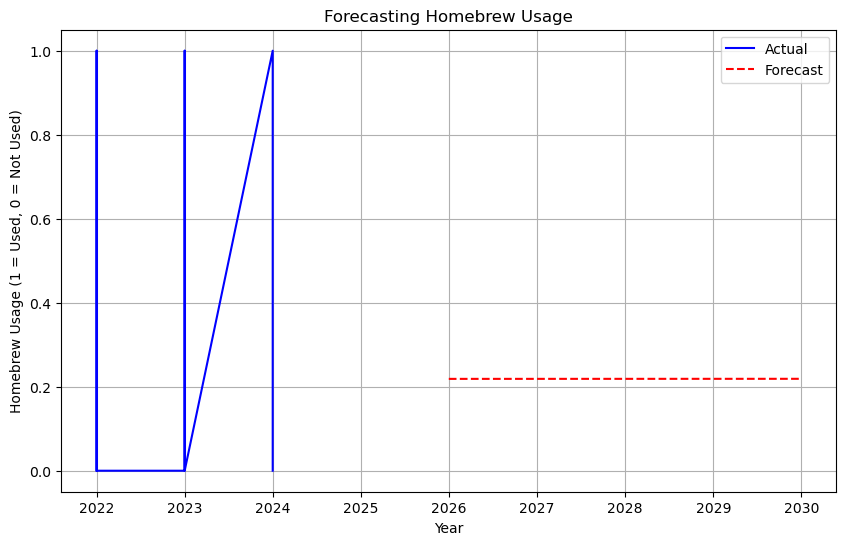

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('StackOverflow_cleaned_datafile.csv', low_memory=False)

# Convert 'Year' column to datetime (if not already)
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Set 'Year' as the index
data = data.set_index('Year')

# List of tools to forecast (you can add more tools to this list)
tools = ['Docker', 'Kubernetes', 'npm', 'Terraform', 'Yarn', 'Unity 3D', 'Homebrew']  # Add more tools as needed

# Loop through each tool to forecast
for tool in tools:
    print(f"\nForecasting for {tool}...")

    # Step 1: Create the binary column for each tool
    tool_present = data['ToolsTechHaveWorkedWith'].str.contains(tool, na=False)
    data[tool] = tool_present.astype(int)

    # Step 2: Check for stationarity using the Augmented Dickey-Fuller test
    tool_usage = data[tool]
    result = adfuller(tool_usage.dropna())
    print(f"ADF Test p-value for {tool}: {result[1]}")

    # If the p-value > 0.05, the data is non-stationary, and we apply differencing
    if result[1] > 0.05:
        print(f"Data for {tool} is non-stationary, applying differencing...")
        tool_usage = tool_usage.diff().dropna()  # First differencing to make the data stationary

    # Step 3: Plot ACF and PACF to determine p, d, q parameters
    plot_acf(tool_usage)
    plt.title(f'ACF for {tool}')
    plt.show()

    plot_pacf(tool_usage)
    plt.title(f'PACF for {tool}')
    plt.show()

    # Step 4: Fit the ARIMA model (order=(p, d, q))
    model = ARIMA(tool_usage, order=(1, 0, 1))  # Adjust (p, d, q) based on ACF/PACF analysis
    model_fit = model.fit()

    # Step 5: Model Summary
    print(model_fit.summary())

    # Step 6: Make Forecasts (e.g., next 5 years)
    forecast_steps = 5  # Forecast the next 5 years
    forecast = model_fit.forecast(steps=forecast_steps)

    # Step 7: Plot Forecast vs Actual

    # Prepare forecast years
    forecast_years = pd.date_range(tool_usage.index[-1], periods=forecast_steps + 1, freq='A')[1:]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(tool_usage.index, tool_usage, label='Actual', color='blue')
    plt.plot(forecast_years, forecast, label='Forecast', color='red', linestyle='--')
    plt.legend()
    plt.title(f'Forecasting {tool} Usage')
    plt.xlabel('Year')
    plt.ylabel(f'{tool} Usage (1 = Used, 0 = Not Used)')
    plt.grid(True)
    plt.show()


Different DevTypes(roles) trend frequencies from yoy.

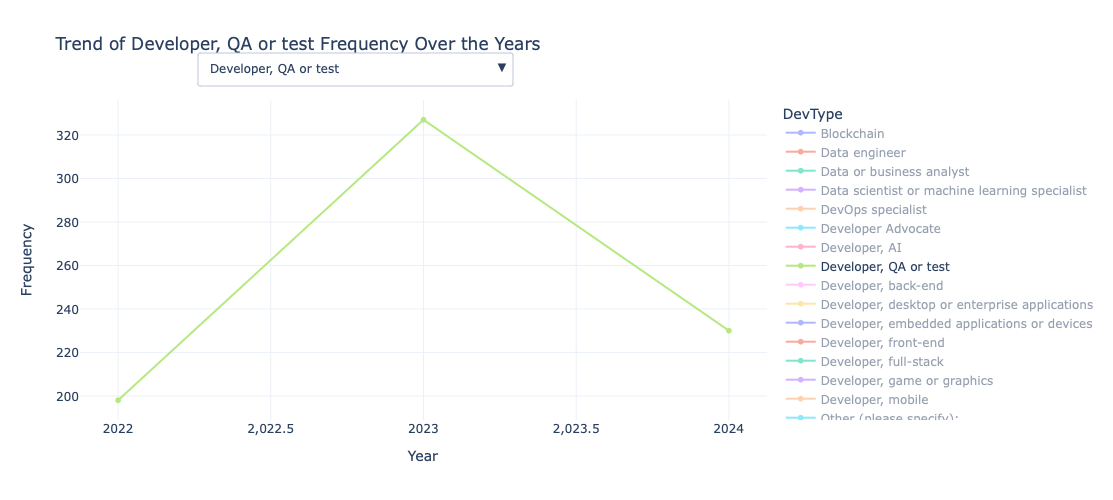

In [92]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Step 1: Load the dataset (replace with your actual file path)
data = pd.read_csv('StackOverflow_cleaned_datafile.csv', low_memory=False)

# Step 2: Convert the 'Year' column to datetime (if it's not already in datetime format)
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Step 3: Handle missing values in 'DevType'
data = data.dropna(subset=['DevType'])  # Drop rows where DevType is NaN

# Step 4: Extract the year from the 'Year' column
data['Year'] = data['Year'].dt.year  # If it's datetime, convert to just year

# Step 5: Group data by 'Year' and 'DevType' and count the occurrences
devtype_yearly_freq = data.groupby(['Year', 'DevType']).size().unstack(fill_value=0)

# Step 6: Create a Plotly figure for the trend chart
fig = go.Figure()

# Step 7: Add traces (lines) for each DevType
for devtype in devtype_yearly_freq.columns:
    fig.add_trace(go.Scatter(
        x=devtype_yearly_freq.index,
        y=devtype_yearly_freq[devtype],
        mode='lines+markers',
        name=devtype,
        hovertemplate=f"Year: %{{x}}<br>Frequency: %{{y}}<br>DevType: {devtype}<extra></extra>",
        hoverlabel=dict(
            bgcolor="red",  # Background color for hover text
            font=dict(
                color="black",  # Font color for hover text
                size=14          # Font size for hover text
            )
        ),
        visible=True if devtype == 'Developer' else 'legendonly'  # By default, only one devtype is visible, others are hidden
    ))

# Step 8: Add a dropdown for filtering DevType
devtypes_list = devtype_yearly_freq.columns.tolist()  # Get list of devtypes
buttons = []
for devtype in devtypes_list:
    buttons.append(
        dict(
            label=devtype,
            method="update",
            args=[{"visible": [True if col == devtype else 'legendonly' for col in devtypes_list]},
                  {"title": f"Trend of {devtype} Frequency Over the Years"}]
        )
    )

# Add the 'Show All' button to show all devtypes
buttons.append(
    dict(
        label="Show All",
        method="update",
        args=[{"visible": [True] * len(devtypes_list)},
              {"title": "Trend of DevType Frequencies Over the Years"}]
    )
)

# Step 9: Customize layout and axis labels
fig.update_layout(
    title="Trend of DevType Frequencies Over the Years",
    xaxis_title="Year",
    yaxis_title="Frequency",
    template="plotly_white",  # You can customize the template (e.g., "plotly_white" or "plotly_dark")
    legend_title="DevType",
    hovermode="x unified",  # Display hover info for all lines at the same x (year)
    width=800,
    height=500,
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        showactive=True,
        x=0.17,
        xanchor="left",
        y=1.15,
        yanchor="top"
    )]
)

# Step 10: Show the plot
fig.show()
